# Лабораторная работа №1 по курсу "Машинное обучение"
## Базаргармаев Н.Д. 401Б

## Подготовка и изучение датасета

### Загружаем библиотеки 

In [1]:
from pandas import read_csv , DataFrame 
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import scipy.spatial
from math import pi,exp
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

### Загрузка датасета и первичный анализ

In [2]:
dataset=read_csv('dataset.csv')

Выводим первые строки

In [3]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,target
0,15689,280000,M,bachelor,single,30,1
1,12704,50000,F,bachelor,single,22,1
2,22068,50000,F,master,single,26,1
3,1472,20000,M,bachelor,single,21,1
4,5739,20000,M,school graduate,single,23,1


Смотрим размерность


In [4]:
dataset.shape

(2386, 7)

Выводим информацию и описание датасета

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2386 non-null   int64 
 1   LIMIT_BAL  2386 non-null   int64 
 2   SEX        2386 non-null   object
 3   EDUCATION  2333 non-null   object
 4   MARRIAGE   2052 non-null   object
 5   AGE        2386 non-null   int64 
 6   target     2386 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 130.6+ KB


In [6]:
dataset.describe()

,ID,LIMIT_BAL,AGE,target
count,2386.000000,2386.00000,2386.000000,2386.000000
mean,15065.131601,140430.71249,36.365465,0.586337
std,8588.040185,121390.58216,9.805644,0.492593
min,16.000000,10000.00000,21.000000,0.000000
25%,7563.750000,50000.00000,28.000000,0.000000
50%,15183.500000,100000.00000,35.000000,1.000000
75%,22657.250000,200000.00000,43.000000,1.000000
max,29975.000000,710000.00000,75.000000,1.000000


###  Смотрим частотности некотрых столбцов и проверяем на наличие нулевых/пустых значений 


In [7]:
#проверяем наличие пропусков в размере кредитного лемита, если отличается от 0, то пропуски есть 
dataset['LIMIT_BAL'].isnull().sum()

0

In [8]:
#Пропуску в полу
dataset['SEX'].isnull().sum()

0

In [9]:
#Частота полов в SEX 
dataset['SEX'].value_counts()

F    1382
M    1004
Name: SEX, dtype: int64

In [10]:
#Пропуски в EDUCATION
dataset['EDUCATION'].isnull().sum()

53

In [11]:
#Частота в EDUCATION
dataset['EDUCATION'].value_counts()

bachelor                1161
master                   609
school graduate          446
other                     67
elementary education      36
PhD                       14
Name: EDUCATION, dtype: int64

In [12]:
#Пропуски в MARRIAGE
dataset['MARRIAGE'].isnull().sum()

334

In [13]:
#Частота  в MARRIAGE
dataset['MARRIAGE'].value_counts()

single              1025
married              972
refuse to answer      55
Name: MARRIAGE, dtype: int64

In [14]:
# Проверяем наличие пропусков в возарсте
dataset['AGE'].isnull().sum()

0

### Описание столбцов датасата
- ID: id человека 
- LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (M = мужской, F = женский )
- EDUCATION: образование ( PhD = доктор,  master = магистр; bachelor = бакалавр; school graduate = выпускник школы; elementary education = начальное образование; other= прочее ).
- MARRIAGE: (refuse to answer = отказываюсь отвечать; married = замужем/женат; single = холост). 
- AGE: возраст в годах
- target - индикатор невозврата денежных средств(Целевая переменная )





### Выводы из первичного анализа данных
- ID Удаляем 
- LIMIT_BAL оставляем преждним 
- SEX кодирум так 1 = M, 0 = F
- в EDUCATION заменим пропуски модой и применим one hot encoding
- в MARRIAGE заменим пропуски модой и применим one hot encoding


## Преобразования признаков исходя из выводов и визуализация распределений

### Преобразования

In [15]:
#удаляем ID
dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,target
0,280000,M,bachelor,single,30,1
1,50000,F,bachelor,single,22,1
2,50000,F,master,single,26,1
3,20000,M,bachelor,single,21,1
4,20000,M,school graduate,single,23,1


In [16]:
#функция преобразующая пол 
def priobr_sex(sex):
    if sex=='M':
        return 1
    elif sex=='F':
        return 0
    
dataset['SEX'] = dataset['SEX'].apply(priobr_sex)
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,target
0,280000,1,bachelor,single,30,1
1,50000,0,bachelor,single,22,1
2,50000,0,master,single,26,1
3,20000,1,bachelor,single,21,1
4,20000,1,school graduate,single,23,1


In [17]:
def to_int(get):
    return int(get)

In [18]:
from scipy.stats import mode
dataset['EDUCATION'].fillna(mode(dataset['EDUCATION']).mode[0], inplace=True)

In [19]:
# Делаем one hot encoding и приравниаем к int, потому что реализация sklearn возвращает категории почему -то в float 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(dataset['EDUCATION'].to_frame())
result = encoder.transform(dataset['EDUCATION'].to_frame())
for i in range(len(encoder.categories_[0])):
    
    dataset[encoder.categories_[0][i]] = result[:,i]
    dataset[encoder.categories_[0][i]] = dataset[encoder.categories_[0][i]].agg(to_int)

    
# EDUCATION Удалим после визуального анализа
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,target,PhD,bachelor,elementary education,master,other,school graduate
0,280000,1,bachelor,single,30,1,0,1,0,0,0,0
1,50000,0,bachelor,single,22,1,0,1,0,0,0,0
2,50000,0,master,single,26,1,0,0,0,1,0,0
3,20000,1,bachelor,single,21,1,0,1,0,0,0,0
4,20000,1,school graduate,single,23,1,0,0,0,0,0,1


In [20]:
dataset['MARRIAGE'].fillna(mode(dataset['MARRIAGE']).mode[0], inplace=True)

In [21]:
# Делаем one hot encoding и приравниаем к int, потому что реализация sklearn возвращает категории почему -то в float 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(dataset['MARRIAGE'].to_frame())
result = encoder.transform(dataset['MARRIAGE'].to_frame())
for i in range(len(encoder.categories_[0])):
    
    dataset[encoder.categories_[0][i]] = result[:,i]
    dataset[encoder.categories_[0][i]] = dataset[encoder.categories_[0][i]].agg(to_int)

    
#MARRIAGE удалим после везуального анализа 
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,target,PhD,bachelor,elementary education,master,other,school graduate,married,refuse to answer,single
0,280000,1,bachelor,single,30,1,0,1,0,0,0,0,0,0,1
1,50000,0,bachelor,single,22,1,0,1,0,0,0,0,0,0,1
2,50000,0,master,single,26,1,0,0,0,1,0,0,0,0,1
3,20000,1,bachelor,single,21,1,0,1,0,0,0,0,0,0,1
4,20000,1,school graduate,single,23,1,0,0,0,0,0,1,0,0,1


### Визуализации

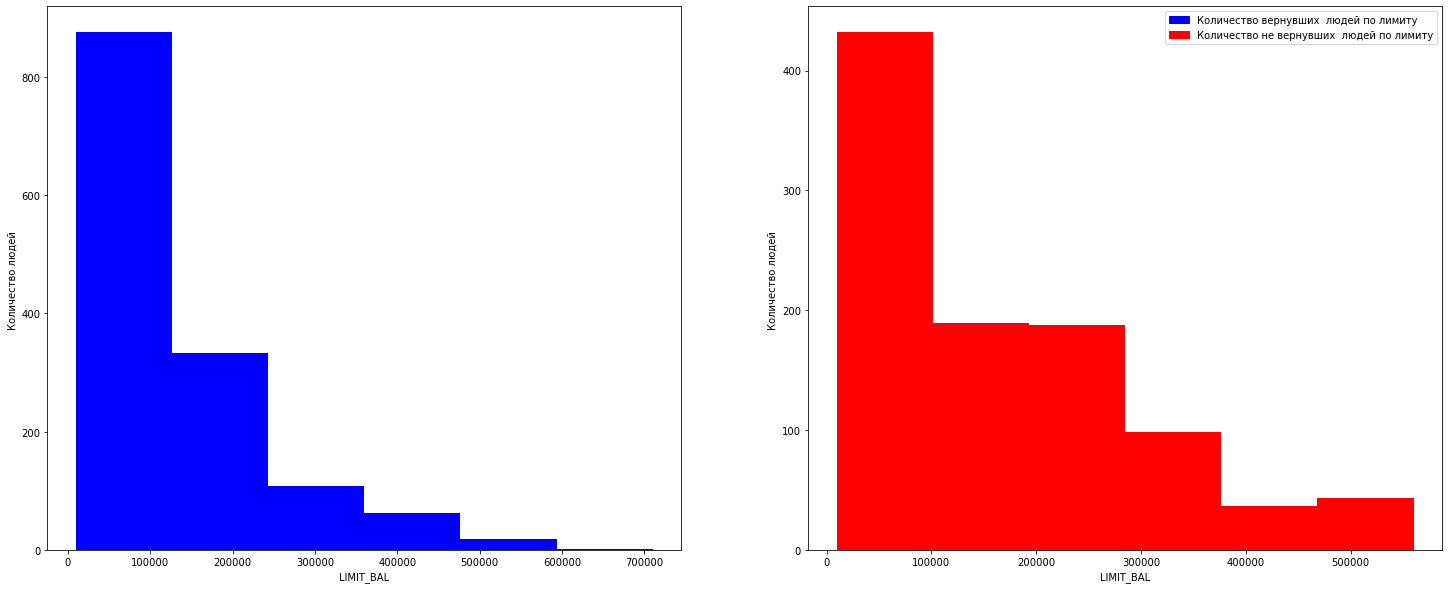

In [22]:
#Визуализация вернувших и не вернувших долг по лимиту 
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['target']==1]['LIMIT_BAL'], bins=6,color='blue')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['target']==0]['LIMIT_BAL'], bins=6,color='red')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество вернувших  людей по лимиту ')
ne_vern = mpatches.Patch(color='red', label='Количество не вернувших  людей по лимиту')
plt.legend(handles=[vern,ne_vern])

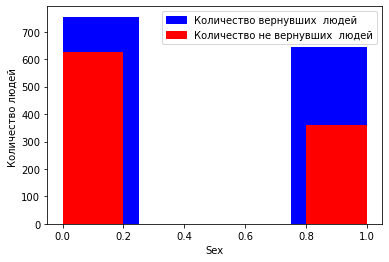

In [23]:
#Распределение вернувших и не вернувших долг по полу
plt.xlabel('Sex')
plt.ylabel('Количество людей ')
plt.hist(x=dataset[dataset['target']==1]['SEX'], bins=4,color='blue')
plt.hist(x=dataset[dataset['target']==0]['SEX'], bins=5,color='red')
vern = mpatches.Patch(color='blue', label='Количество вернувших  людей ')
ne_vern = mpatches.Patch(color='red', label='Количество не вернувших  людей' )
plt.legend(handles=[vern,ne_vern])

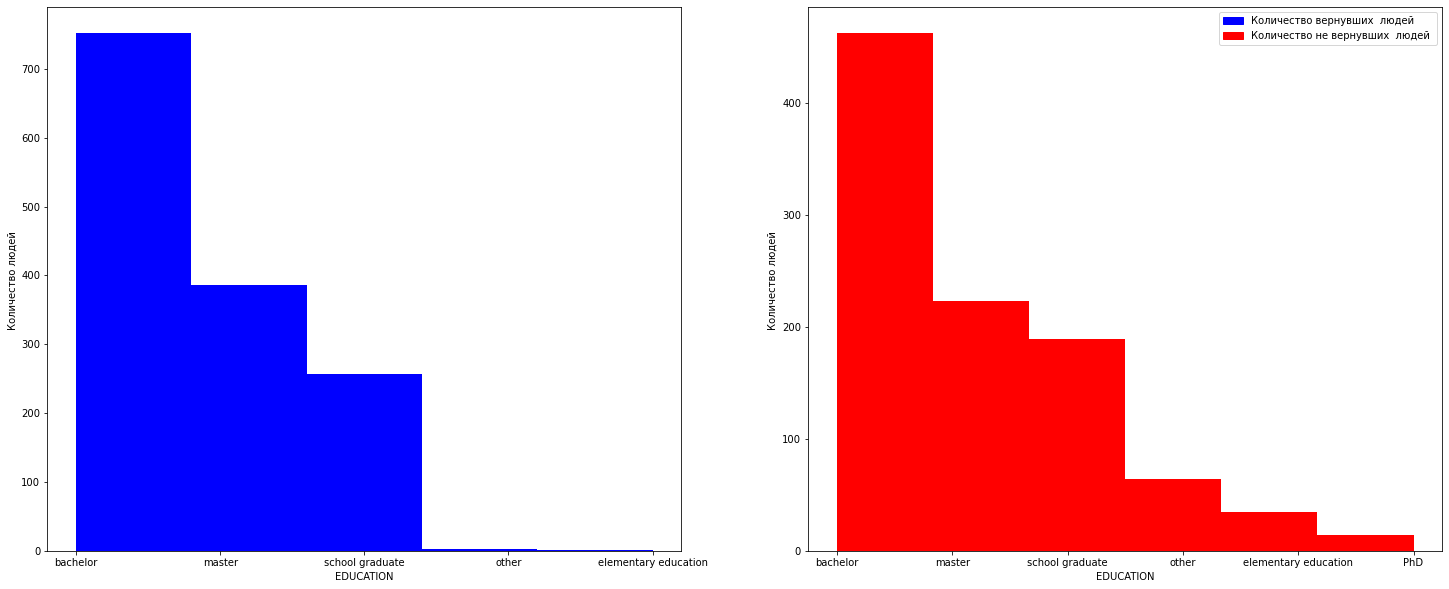

In [24]:
#Визуализация вернувших и не вернувших долг по образованию
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['target']==1]['EDUCATION'], bins=5,color='blue')
plt.xlabel('EDUCATION')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['target']==0]['EDUCATION'], bins=6,color='red')
plt.xlabel('EDUCATION')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество вернувших  людей  ')
ne_vern = mpatches.Patch(color='red', label='Количество не вернувших  людей ')
plt.legend(handles=[vern,ne_vern])

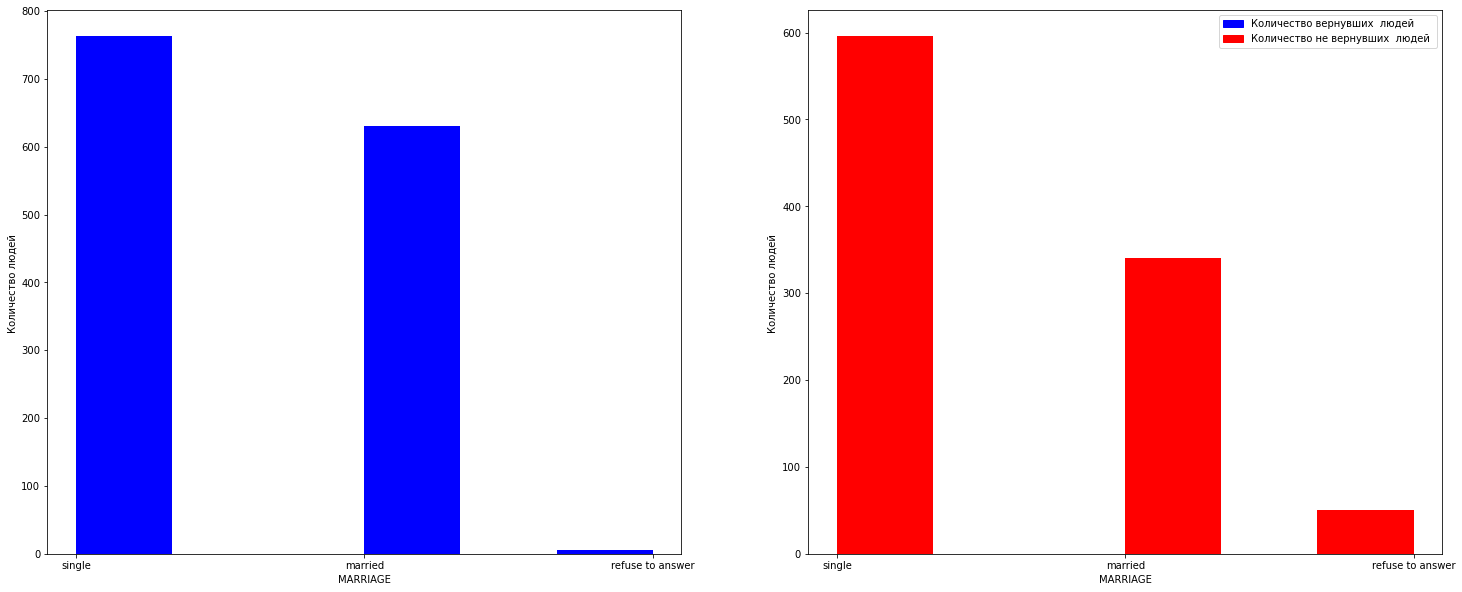

In [25]:
#Визуализация вернувших и не вернувших долг по семейнмоу положеию
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['target']==1]['MARRIAGE'], bins=6,color='blue')
plt.xlabel('MARRIAGE')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['target']==0]['MARRIAGE'], bins=6,color='red')
plt.xlabel('MARRIAGE')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество вернувших  людей  ')
ne_vern = mpatches.Patch(color='red', label='Количество не вернувших  людей ')
plt.legend(handles=[vern,ne_vern])

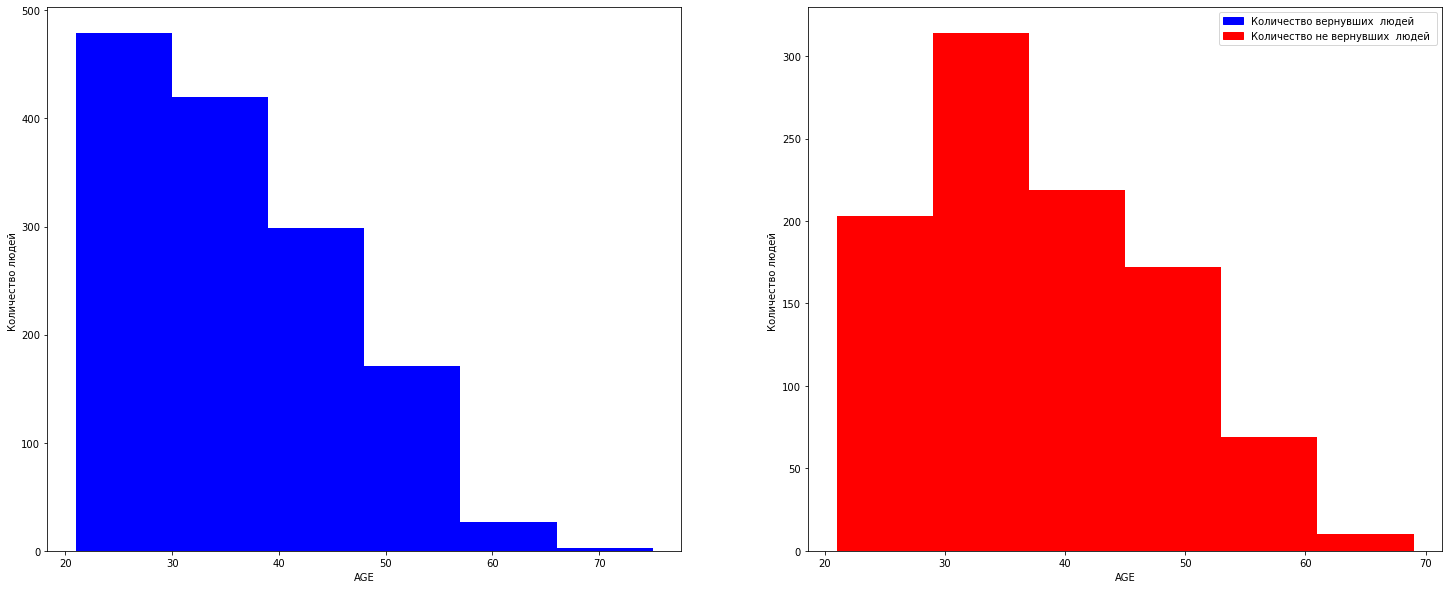

In [26]:
#Визуализация вернувших и не вернувших долг по возрастам 
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.hist(x=dataset[dataset['target']==1]['AGE'], bins=6,color='blue')
plt.xlabel('AGE')
plt.ylabel('Количество людей ')
plt.subplot(1, 2, 2)
plt.hist(x=dataset[dataset['target']==0]['AGE'], bins=6,color='red')
plt.xlabel('AGE')
plt.ylabel('Количество людей ')
vern = mpatches.Patch(color='blue', label='Количество вернувших  людей  ')
ne_vern = mpatches.Patch(color='red', label='Количество не вернувших  людей ')
plt.legend(handles=[vern,ne_vern])

## Выводы по визуализации 
- По лимиту можно сказать, что при лимитах от 200000 до 500000 люди чаще не возвращают кредит чем возвращают при этом от 
600 000 до 700 000 все возвращают 
- По полу можно сказать, что женщины чаще не возвращают кредиты, чем мужчины(примерно в 2 раза ), при этом колличество женщин и мужчин вернувших долг примерно одинаково 
- По образованию можно сказать, что бакалавры и магисты чаще возращают кредит, чем не возвращают(примерно 200-300 человек
разница). Только окончишившие школу чуть чаше возращают кредит чаще не возвращают(разница примерно 50 человек ). Люди с только с начальных образование и с другим образованием  значительно чаще не возращают кредит(примерно 100 раз)
- По семейному положению можно сказать, что люди холостые чаще возвращают кредит чем не возращают(разница примерно 100 человек)  при это люди женатые чаще возращают кредит, чем не возвращают(200 человек разница), отсюда следует, что безоопастнее давать кредиты женатым чем холостым. Люди отказывшиеся сказать о своем семейном положении значительно чаще 
не возвращают кредиты чем возвращают(примерно в  5-7 раз). Возможно это вызвано, что мошенники так пытаются не навлечь наказание на своих родтственников, когда берут кредиты, которые не смонут вернуть 
- По возрасту можно сказать, что люди от 20 до 30 чаще возвращают кредиты чем не возвращают (разница примерно 300 человек).
люди от 30 до 40 чаще возвращают кредиты чем не возвращают (разница примерно 100 человек). От 40 до 70 люди примерно одинаково часто возвращают кредиты чем не возвращают

In [27]:
# удаляем MARRIAGE  и EDUCATION 
del dataset['MARRIAGE']
del dataset['EDUCATION']

# Реализация алгоритма k ближайших соседей с использованием весов и наивного байесовского классификатора

### Фунция для подсчета метрик классификации и разделение выборки на тест и трейн

In [28]:
def metrics(pred, Y_test):
    
    
    print("Accuracy: ", (pred==Y_test).mean())
    print("Pprecision: ", precision_score(pred, Y_test, average='micro'))
    print("Recall: ", recall_score(pred, Y_test, average='micro'))
    print("F1: ", f1_score(pred, Y_test, average='micro'))


In [29]:
#разбиваю выборку на трейн и тест. Для теста выделяю 30% выборки.
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target',axis=1), dataset['target'], test_size=0.3, random_state=42,shuffle=True)

### Наивный байесовский классификатор

In [30]:
#мой наивный байесовский классификатор реализован в виде класса NaivBaisClassificator в нем есть 2 главных публичный метода 
#fit - для обучения и predict - для предсказания , остальные методы приватные и используются в публичных.
class NaivBaisClassificator:
    
    #при инициализации мы создаем out - это словарь. Ключи этого словаря будут название фич. А значения по ключу будет 
    #датафрейм.
    #Каждый датафрейм является Likelihood Table т.е. таблицей правдоподобия. На основе этих таблиц в методе -onepredict будут
    #делаться предскания о пренадлежности объекта к классу 1 или 0
    def __init__(self):
        self.out={}
    
    #метод _make_likelihood_Table считает Likelihood Table для конкретного признака 
    def _make_likelihood_Table(self,labels_and_serie):
        a=labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]].value_counts()/len(labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]])
        b=labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]].value_counts()/len(labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]])
        out_dataframe=DataFrame()
        if set(a.keys())==set(b.keys()):
        
            out_dataframe[a.name+'_1']=a
            out_dataframe[b.name+'_0']=b
            return out_dataframe
        if len(set(a.keys())-set(b.keys()))!=0:
            for m in list(set(a.keys())-set(b.keys())):
                b[m]=1/len(labels_and_serie[labels_and_serie['target']==0][labels_and_serie.keys()[1]])
        if len(set(b.keys())-set(a.keys()))!=0:
            for m in list(set(b.keys())-set(a.keys())):
                        a[m]=1/len(labels_and_serie[labels_and_serie['target']==1][labels_and_serie.keys()[1]])
        out_dataframe[a.name+'_1']=a
        out_dataframe[b.name+'_0']=b
        return out_dataframe
    
    
    #метод fit заполняет словарь out датафреймами, которые являются Likelihood Table
    def fit(self,train,test):
        data=DataFrame()
        data=train.copy()
        data['target']=test.values
        dict_of_df={}
        for i in data.columns[0:-1]:
            dict_of_df[i]=self._make_likelihood_Table(data[['target',i]])
        self.out=dict_of_df
    
    
    #метод _onepredict делает предсказания класса для одного объекта используя словарь out 
    def _onepredict(self,test):
        zero=1
        one=1
        for i in test.keys():
            #использую отловщик ошибок, потому что возможна такая ситуация, что нет ключа в таблице на обучении, это возможно
            #если не было этого значения в обучающей выборке. Особенно это актуально для параметров являющимися действительными
            #числами. К примеру Fare. Я не удалил этот признак, потому что во первых он все-таки может быть в обуч выборке
            # во вторых он может быть полезен в других моделях
            try:
                one=one*float(self.out[i][i+'_1'][test[i]])
                zero=zero*float(self.out[i][i+'_0'][test[i]])
            except:
                one=one*1
                zero=zero*1
        if zero>one:
        
            return 0
        else:
        
            return 1
        
    #метод predict использует метод _onepredict для предсказания класса для одного объекта, при помощи цикла метод predict делает 
    #предсказания для каждлго объекта  и возвращает в итоге список меток для каждого объекта
    def predict(self,test_dataset):
        final_predict=[]
        for k in range(test_dataset.shape[0]):
            final_predict.append(self._onepredict(test_dataset.iloc[k]))
        return final_predict
    

In [31]:
#обучаю свою модель модель
my_NaivBais=NaivBaisClassificator()
my_NaivBais.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(my_NaivBais.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(my_NaivBais.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.6844311377245509
Pprecision:  0.6844311377245509
Recall:  0.6844311377245509
F1:  0.6844311377245509
Метрики на тестовой выборки 
Accuracy:  0.6508379888268156
Pprecision:  0.6508379888268156
Recall:  0.6508379888268156
F1:  0.6508379888268156


In [32]:
#обучаем моледь из sklearn
NaivBais=BernoulliNB()
NaivBais.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(NaivBais.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(NaivBais.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.6676646706586826
Pprecision:  0.6676646706586826
Recall:  0.6676646706586826
F1:  0.6676646706586826
Метрики на тестовой выборки 
Accuracy:  0.63268156424581
Pprecision:  0.63268156424581
Recall:  0.63268156424581
F1:  0.63268156424581


#### Выводы по метрикам 
- Моя модель и модель из sklearn практичски не переобучились(разница метрик на трейне и тесте примерно равна 3% для каждой модели)
- Моя модель чуть лучше предсказывает на трейне и на тесте чем модель из sklearn(разница примерно 2%) 
- Метрики обоих моделей находятся между 0.63 и 0.68. 

### Алгоритм k ближайших соседей с использованием весов

In [33]:
#мой Метод k-ближайших соседей реализован в виде класса Knn с 2 публичными методами fit и predict. fit -нужен для обучения.
# predict для предсказания.

class KNN:
    #при инициализации в конструктор передается 2 параметра k и h. k- количство соседей , h -длинна парзеновского окна
    def __init__(self, k,h=1):
        self.h=h
        self.k = k
    
    #получаю обучающую выборку    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
   
    #метод _jadro_K является приватным. Он реализует вычисление Гауссовского ядра,используемового в парзеновском окне
    def _jadro_K(self,z):
        
        return ((2*pi)**(-0.5))*exp(-0.5*z**(2))
    #метод predict классифицирует объекты
    def predict(self, X_test):
        output = []#предсказанные метки 
        for i in range(len(X_test)):
            d = []#растояния между тестовым объектом и объектами обучающей выборки
            votes = []#метки ближайших объектов
            for j in range(len(X_train)):
                #считаем растояние 
                dist = scipy.spatial.distance.euclidean(X_train.iloc[j] , X_test.iloc[i])
                 #считается расстояние и применяется парзеновское окно с гауссовским ядром
                #для реализации весов. Чем меньше h , тем меньше мы учитываем далекие объекты
                weight=self._jadro_K(scipy.spatial.distance.euclidean(X_train.iloc[j] , X_test.iloc[i])/self.h)
                d.append([dist, j,weight])
            
            #сортируем расстояния до тестового объекта 
            d.sort()
            d = d[0:self.k]#берем k ближайших тестовых объектов
            zero_score=0
            one_score=0
            #достаем метки
            for a, j, k in d:
                votes.append(y_train.iloc[j])
            #считаем частотность 1 и 0 учитывая веса
            for j in range(len(votes)):
                if votes[j]==0:
                    zero_score=zero_score+1*d[j][2]
                if votes[j]==1:
                    one_score=one_score+1*d[j][2]
            #смотрим какого класса больше
            if zero_score>one_score:
                ans=0
            if  one_score>zero_score:
                ans=1
            output.append(ans)
        return output
    

In [34]:
#обучаю свою модель с k=5 и h=5 . Что значит,смотреть по 5  соседям и использовать парзеновское окно равное 5
my_KNN = KNN(5,5)
my_KNN.fit(X_train, y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(my_KNN.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(my_KNN.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.7275449101796407
Pprecision:  0.7275449101796407
Recall:  0.7275449101796407
F1:  0.7275449101796408
Метрики на тестовой выборки 
Accuracy:  0.5754189944134078
Pprecision:  0.5754189944134078
Recall:  0.5754189944134078
F1:  0.5754189944134078


In [35]:

#обучаем моледь из sklearn
sk_knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
sk_knn.fit(X_train,y_train)
#делаем предсказания на трейне и на тесте и смотрим метрики
print('Метрики на обучающей выборки ')
metrics(sk_knn.predict(X_train),y_train)
print('Метрики на тестовой выборки ')
metrics(sk_knn.predict(X_test),y_test)

Метрики на обучающей выборки 
Accuracy:  0.9467065868263473
Pprecision:  0.9467065868263473
Recall:  0.9467065868263473
F1:  0.9467065868263473
Метрики на тестовой выборки 
Accuracy:  0.5572625698324022
Pprecision:  0.5572625698324022
Recall:  0.5572625698324022
F1:  0.5572625698324022


#### Выводы по метрикам
- Разница метрик на тесте между моей моделью и моделью из sklearn мала(примерно 2%)
- У модели из sklearn наблюдается сильное переобучение(разница метрик на тесте и на трейне порядка 0.4).Моя модель тоже переобучался, но не так сильно как модель из sklearn(0.2 разница метрик на трейне и на тесте). Это разница в переобучаемости вызвана на мой взгляд тем, как считаются веса в модели. Моя модель использует парзеновское окно с гауссовским ядром для расчета веса, а модель из sklearkиспользует формулу w_i=1/p(x,x_i), где p-функция рассчета расстояния.

### На последок запишим наш измененный датасет в файл для  использования в следующей лабораторной

In [36]:
dataset.to_csv('remastered_dataset.csv',index=False)